In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt

from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
train_data_path = '/content/drive/My Drive/Skripsi/tiga/Training'
validasi_data_path = '/content/drive/My Drive/Skripsi/tiga/Validasi'
Test_path = '/content/drive/My Drive/Skripsi/tiga/Test'
img_rows = 100
img_cols = 100
epochs = 29
batch_size = 7
num_of_train_samples = 1939
num_of_validasi_samples = 469
test_samples = 119

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/ 255)

In [ ]:
valid_datagen = ImageDataGenerator(rescale=1/ 255)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1/ 255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

Found 1939 images belonging to 4 classes.


In [ ]:
validation_generator = valid_datagen.flow_from_directory(validasi_data_path,
                                                        target_size=(img_rows, img_cols),
                                                        batch_size=batch_size, shuffle=False, 
                                                        class_mode='categorical')

Found 469 images belonging to 4 classes.


In [ ]:
model = Sequential()
model.add(Convolution2D(32, (3, 3),strides=(1,1), input_shape=(img_rows, img_cols, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(32, (3, 3), strides=(1,1),padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3, 3),strides=(1,1), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
hist = model.fit_generator(train_generator,
                    steps_per_epoch=num_of_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_of_validasi_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/29
277/277 [==============================] - 607s 2s/step - loss: 0.3162 - accuracy: 0.8788 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 2/29
277/277 [==============================] - 27s 99ms/step - loss: 0.0415 - accuracy: 0.9892 - val_loss: 6.0944e-04 - val_accuracy: 1.0000
Epoch 3/29
277/277 [==============================] - 27s 99ms/step - loss: 0.0245 - accuracy: 0.9933 - val_loss: 1.1268e-05 - val_accuracy: 1.0000
Epoch 4/29
277/277 [==============================] - 27s 99ms/step - loss: 0.0159 - accuracy: 0.9928 - val_loss: 5.2397e-06 - val_accuracy: 1.0000
Epoch 5/29
277/277 [==============================] - 27s 98ms/step - loss: 0.0561 - accuracy: 0.9819 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 6/29
277/277 [==============================] - 27s 99ms/step - loss: 0.0575 - accuracy: 0.9819 - val_loss: 1.2147e-05 - val_accuracy: 1.0000
Epoch 7/29
277/277 [=========================

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 98, 98, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        1

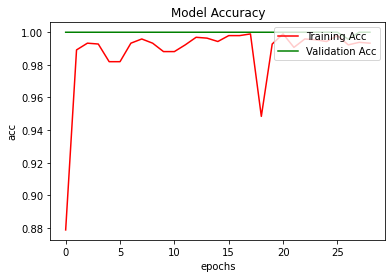

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['accuracy'], color='red')
ax.plot(hist.history['val_accuracy'], color ='green')
plt.title('Model Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['Training Acc', 'Validation Acc'], loc='upper right')
plt.show()

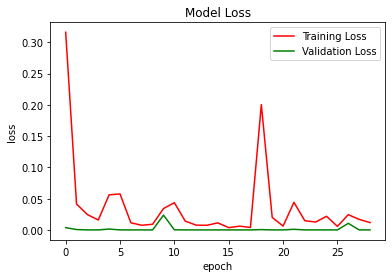

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_facecolor('w')
ax.grid(b=False)
ax.plot(hist.history['loss'], color='red')
ax.plot(hist.history['val_loss'], color ='green')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [ ]:
test_generator = test_datagen.flow_from_directory(Test_path,target_size=(img_rows, img_cols),batch_size=batch_size,shuffle=False,
                                     class_mode='categorical')

Found 119 images belonging to 4 classes.


In [ ]:
model.save('/content/drive/My Drive/Skripsi/second.h5')

In [ ]:
model = keras.models.load_model('/content/drive/My Drive/Skripsi/second.h5')

In [ ]:
cek = train_generator.class_indices
print(cek)

{'Clementine': 0, 'Kumquats': 1, 'Lemon': 2, 'Nipis': 3}


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size = (img_rows, img_cols),
    batch_size = batch_size,
    shuffle=False,
    class_mode = 'categorical',
    )

Found 1939 images belonging to 4 classes.


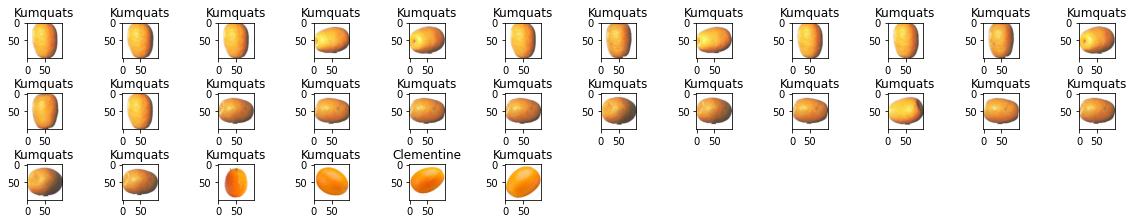

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os
testing_path = '/content/drive/My Drive/Skripsi/tiga/Test/Kumquats'
i = 0
plt.figure(figsize=[20,15]) # ukuran gambar
plt.subplots_adjust(wspace = 0.5, hspace = 1)# jarak antara subplots
for filename in os.listdir(testing_path):
    if filename.endswith(".jpg"):
        img= image.load_img(testing_path+'/'+filename, target_size=(100,100,3))
        img = np.asarray(img)
        plt.subplot(12,12,i+1) #m = baris n= kolom p= nomor urut indeks
        i+=1
        imgplot = plt.imshow(img)
        img = np.expand_dims(img, axis=0)
        from keras.models import load_model
        saved_model = load_model('/content/drive/My Drive/Skripsi/second.h5')
        output = saved_model.predict(img)
        result = output[0]
        final = np.argmax(result)
        
        if final == 0:
          plt.title("Clementine")
        if final == 1:
          plt.title("Kumquats")
        if final == 2:
          plt.title("Lemon")
        if final == 3:
          plt.title("Nipis")

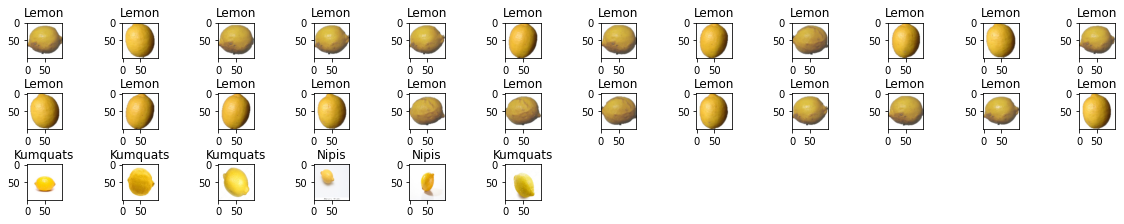

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os
testing_path = '/content/drive/My Drive/Skripsi/tiga/Test/Lemon'
i = 0
plt.figure(figsize=[20,15]) # ukuran gambar
plt.subplots_adjust(wspace = 0.5, hspace = 1)# jarak antara subplots
for filename in os.listdir(testing_path):
    if filename.endswith(".jpg"):
        img= image.load_img(testing_path+'/'+filename, target_size=(100,100,3))
        img = np.asarray(img)
        plt.subplot(12,12,i+1) #m = baris n= kolom p= nomor urut indeks
        i+=1
        imgplot = plt.imshow(img)
        img = np.expand_dims(img, axis=0)
        from keras.models import load_model
        saved_model = load_model('/content/drive/My Drive/Skripsi/second.h5')
        output = saved_model.predict(img)
        result = output[0]
        final = np.argmax(result)
        
        if final == 0:
          plt.title("Clementine")
        if final == 1:
          plt.title("Kumquats")
        if final == 2:
          plt.title("Lemon")
        if final == 3:
          plt.title("Nipis")

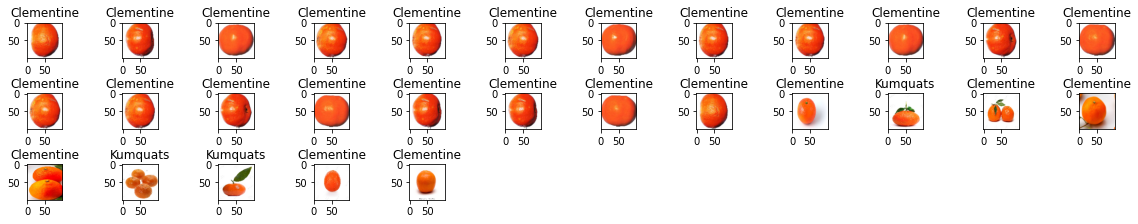

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os
testing_path = '/content/drive/My Drive/Skripsi/tiga/Test/Clementine'
i = 0
plt.figure(figsize=[20,15]) # ukuran gambar
plt.subplots_adjust(wspace = 0.5, hspace = 1)# jarak antara subplots
for filename in os.listdir(testing_path):
    if filename.endswith(".jpg"):
        img= image.load_img(testing_path+'/'+filename, target_size=(100,100,3))
        img = np.asarray(img)
        plt.subplot(12,12,i+1) #m = baris n= kolom p= nomor urut indeks
        i+=1
        imgplot = plt.imshow(img)
        img = np.expand_dims(img, axis=0)
        from keras.models import load_model
        saved_model = load_model('/content/drive/My Drive/Skripsi/second.h5')
        output = saved_model.predict(img)
        result = output[0]
        final = np.argmax(result)
        
        if final == 0:
          plt.title("Clementine")
        if final == 1:
          plt.title("Kumquats")
        if final == 2:
          plt.title("Lemon")
        if final == 3:
          plt.title("Nipis")

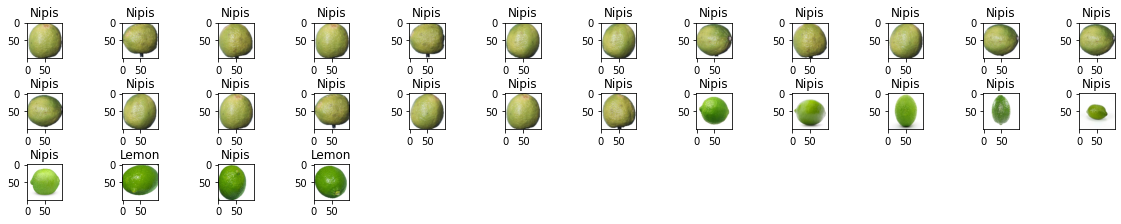

In [ ]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import os
testing_path = '/content/drive/My Drive/Skripsi/tiga/Test/Nipis'
i = 0
plt.figure(figsize=[20,15]) # ukuran gambar
plt.subplots_adjust(wspace = 0.5, hspace = 1)# jarak antara subplots
for filename in os.listdir(testing_path):
    if filename.endswith(".jpg"):
        img= image.load_img(testing_path+'/'+filename, target_size=(100,100,3))
        img = np.asarray(img)
        plt.subplot(12,12,i+1) #m = baris n= kolom p= nomor urut indeks
        i+=1
        imgplot = plt.imshow(img)
        img = np.expand_dims(img, axis=0)
        from keras.models import load_model
        saved_model = load_model('/content/drive/My Drive/Skripsi/second.h5')
        output = saved_model.predict(img)
        result = output[0]
        final = np.argmax(result)
        
        if final == 0:
          plt.title("Clementine")
        if final == 1:
          plt.title("Kumquats")
        if final == 2:
          plt.title("Lemon")
        if final == 3:
          plt.title("Nipis")

In [ ]:
predictions = model.predict_generator(generator=test_generator) 
y_pred = [np.argmax(probas) for probas in predictions] 
y_test = test_generator.classes
class_names = test_generator.class_indices.keys()



<Figure size 432x288 with 0 Axes>

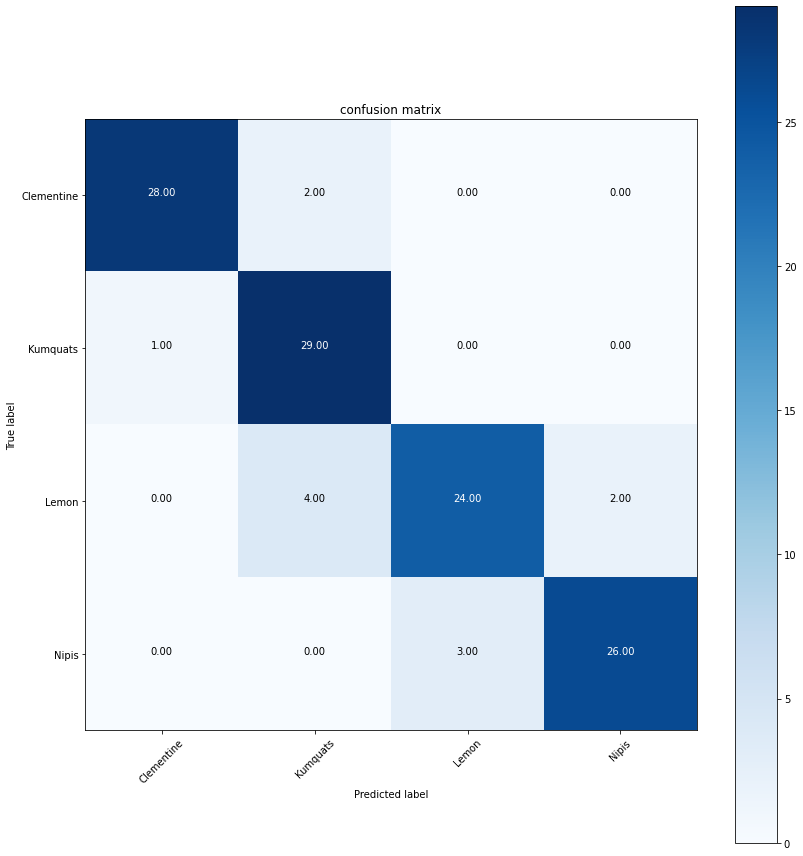

In [ ]:
from sklearn.metrics import confusion_matrix 
import itertools 
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues): 
  plt.figure(figsize=(12,12))
  plt.imshow(cm, interpolation='nearest', cmap=cmap) 
  plt.title(title) 
  plt.colorbar() 
  tick_marks = np.arange(len(classes)) 
  plt.xticks(tick_marks, classes, rotation=45) 
  plt.yticks(tick_marks, classes)
  fmt = '.2f' 
  thresh = cm.max() / 2. 
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): 
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label') 
    plt.xlabel('Predicted label') 
    plt.tight_layout()
# compute confusion matrix 
cnf_matrix = confusion_matrix(y_test, y_pred) 
np.set_printoptions(precision=2)
# plot normalized confusion matrix 
plt.figure() 
plot_confusion_matrix(cnf_matrix, classes=class_names, title='confusion matrix') 
plt.show() 



In [ ]:
print('Classification Report') 
target_names = ['Clementine','Kumquats', 'Lemon', 'Nipis']
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

  Clementine       0.97      0.93      0.95        30
    Kumquats       0.83      0.97      0.89        30
       Lemon       0.89      0.80      0.84        30
       Nipis       0.93      0.90      0.91        29

    accuracy                           0.90       119
   macro avg       0.90      0.90      0.90       119
weighted avg       0.90      0.90      0.90       119

